In [1]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers, models

In [2]:
IMAGE_SIZE = 320
BATCH_SIZE = 16
CHANNELS = 3
EPOCHS = 50

In [3]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Colab Notebooks/leaves",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 631 files belonging to 2 classes.


In [6]:
class_names = dataset.class_names
class_names

['bad', 'good']

In [7]:
len (dataset)

40

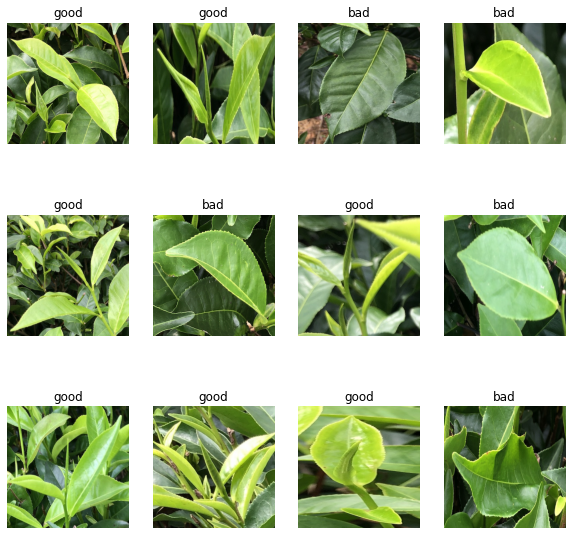

In [8]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [9]:
len(dataset)

40

In [10]:
train_size = 0.8
len(dataset)*train_size

32.0

In [11]:
train_ds=dataset.take(17)
len(train_ds)

17

In [12]:
test_ds = dataset.skip(17)
len(test_ds)

23

In [13]:
val_size=0.1
len(dataset)*val_size

4.0

In [14]:
val_ds=test_ds.take(2)
len(val_ds)

2

In [15]:
test_ds = test_ds.skip(2)
len(test_ds)

21

In [16]:
#this is the wrap up of all the above codes

def get_dataset_partitions_tf (ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size = 1000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds = ds.take (train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

32

In [19]:
len(val_ds)

4

In [21]:
len(test_ds)

4

In [22]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [25]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3) , activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3) , activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3) , activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 320, 320, 3)         0         
                                                                 
 sequential_1 (Sequential)   (16, 320, 320, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 318, 318, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (16, 159, 159, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (16, 157, 157, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (16, 78, 78, 64)         0         
 2D)                                                  

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
32/32 [==============================] - 127s 3s/step - loss: 0.7537 - accuracy: 0.5189 - val_loss: 0.6675 - val_accuracy: 0.5625
Epoch 2/50
32/32 [==============================] - 82s 3s/step - loss: 0.6921 - accuracy: 0.5308 - val_loss: 0.6645 - val_accuracy: 0.6719
Epoch 3/50
32/32 [==============================] - 83s 3s/step - loss: 0.6139 - accuracy: 0.6203 - val_loss: 0.5354 - val_accuracy: 0.7344
Epoch 4/50
32/32 [==============================] - 82s 3s/step - loss: 0.4068 - accuracy: 0.8012 - val_loss: 0.7400 - val_accuracy: 0.7188
Epoch 5/50
32/32 [==============================] - 82s 3s/step - loss: 0.3554 - accuracy: 0.8588 - val_loss: 0.4553 - val_accuracy: 0.7500
Epoch 6/50
32/32 [==============================] - 82s 3s/step - loss: 0.3408 - accuracy: 0.8728 - val_loss: 0.3829 - val_accuracy: 0.8594
Epoch 7/50
32/32 [==============================] - 82s 3s/step - loss: 0.2894 - accuracy: 0.8827 - val_loss: 0.3876 - val_accuracy: 0.8281
Epoch 8/50
32/32 [=

In [ ]:
scores = model.evaluate(test_ds)

4/4 [==============================] - 2s 432ms/step - loss: 0.2214 - accuracy: 0.9400


In [ ]:
scores

[0.22138112783432007, 0.9399999976158142]

In [ ]:
history

In [ ]:
history.params 

{'epochs': 50, 'steps': 17, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history ['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

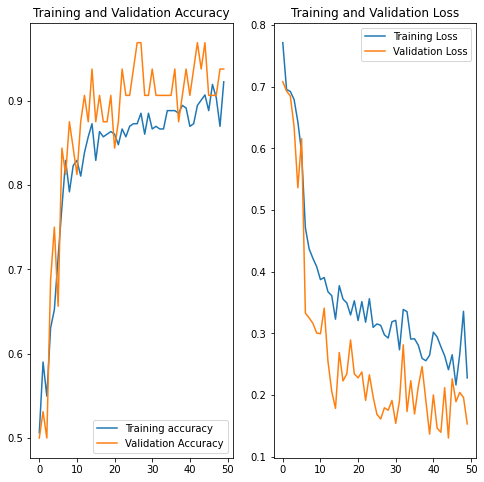

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual label: good
Predicted label: good


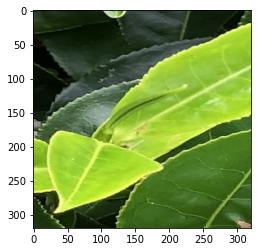

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
  
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("First image to predict")
  plt.imshow(first_image)
  print("Actual label:", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("Predicted label:", class_names[np.argmax(batch_prediction[0])])


In [ ]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0) #create a batch

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])),2)
  return predicted_class, confidence

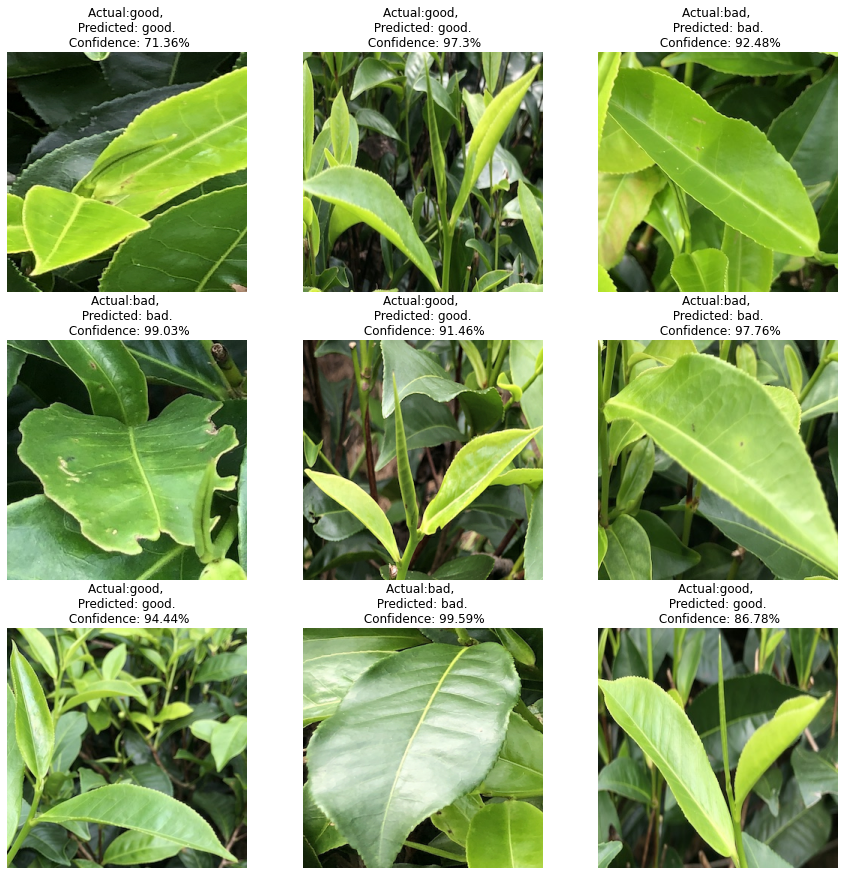

In [ ]:
plt.figure(figsize = (15,15))

for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual:{actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%")

    plt.axis("off")

In [ ]:
model_version = max([int(i) for i in os.listdir("/content/drive/My Drive/Colab Notebooks/model")+[0]])+1
model.save(f"/content/drive/My Drive/Colab Notebooks/model/{model_version}")

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/model/1/assets
